In [30]:
print("\u0905\u0928\u0940\u0936")

अनीश


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [71]:
df = pd.read_csv("banana_quality.csv")
df

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [72]:
#binary encoding.

df['Quality'] = df['Quality'].apply(lambda x: 1 if x == 'Good' else 0)

In [73]:
df

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,0
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,0
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,0
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,0


In [7]:

df.shape


(8000, 8)

In [8]:
df.isnull().sum()


Size           0
Weight         5
Sweetness      2
Softness       2
HarvestTime    1
Ripeness       3
Acidity        1
Quality        0
dtype: int64

In [9]:

df.isnull().sum().sum()


14

In [10]:

 df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object

In [11]:

 (df == 0).sum()


Size              2
Weight            0
Sweetness         2
Softness          0
HarvestTime       2
Ripeness          1
Acidity           1
Quality        3994
dtype: int64

In [12]:

 (df == 0).sum().sum()

4002

In [13]:

 df['Size'].mean().round(2)


-0.75

In [14]:

df.corr()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
Size,1.000000,-0.181955,-0.257237,0.164435,0.581919,0.042415,-0.140351,0.353276
Weight,-0.181955,1.000000,0.422374,-0.189907,-0.079308,-0.034820,0.443661,0.388612
Sweetness,-0.257237,0.422374,1.000000,-0.095040,-0.201116,0.180424,0.186261,0.377178
Softness,0.164435,-0.189907,-0.095040,1.000000,0.194324,-0.253744,-0.145959,-0.001870
HarvestTime,0.581919,-0.079308,-0.201116,0.194324,1.000000,0.107190,-0.090772,0.376842
Ripeness,0.042415,-0.034820,0.180424,-0.253744,0.107190,1.000000,-0.351788,0.350737
Acidity,-0.140351,0.443661,0.186261,-0.145959,-0.090772,-0.351788,1.000000,-0.001240
Quality,0.353276,0.388612,0.377178,-0.001870,0.376842,0.350737,-0.001240,1.000000


In [15]:

corr_matrix = df.corr().abs()


sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))


In [16]:

sol_df = sol.reset_index()
sol_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
sol_df['Correlation'] = sol_df['Correlation'].round(2)

print(sol_df)

      Feature 1    Feature 2  Correlation
0          Size  HarvestTime         0.58
1        Weight      Acidity         0.44
2        Weight    Sweetness         0.42
3        Weight      Quality         0.39
4     Sweetness      Quality         0.38
5   HarvestTime      Quality         0.38
6          Size      Quality         0.35
7      Ripeness      Acidity         0.35
8      Ripeness      Quality         0.35
9          Size    Sweetness         0.26
10     Softness     Ripeness         0.25
11    Sweetness  HarvestTime         0.20
12     Softness  HarvestTime         0.19
13       Weight     Softness         0.19
14    Sweetness      Acidity         0.19
15         Size       Weight         0.18
16    Sweetness     Ripeness         0.18
17         Size     Softness         0.16
18     Softness      Acidity         0.15
19         Size      Acidity         0.14
20  HarvestTime     Ripeness         0.11
21    Sweetness     Softness         0.10
22  HarvestTime      Acidity      

In [29]:

most_corr_pair = sol_df.iloc[0]
feature1, feature2 = most_corr_pair['Feature 1'], most_corr_pair['Feature 2']

x = df[feature1]
y = df[feature2]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25 , random_state=42)

training_x = X_train.shape[0]
testing_x = X_test.shape[0]
training_y = Y_train.shape[0]
testing_y = Y_test.shape[0]

print("the size of training dataset: ",(training_x, training_y))
print("the size of testing dataset:  ",(testing_x, testing_y))

the size of training dataset:  (6000, 6000)
the size of testing dataset:   (2000, 2000)


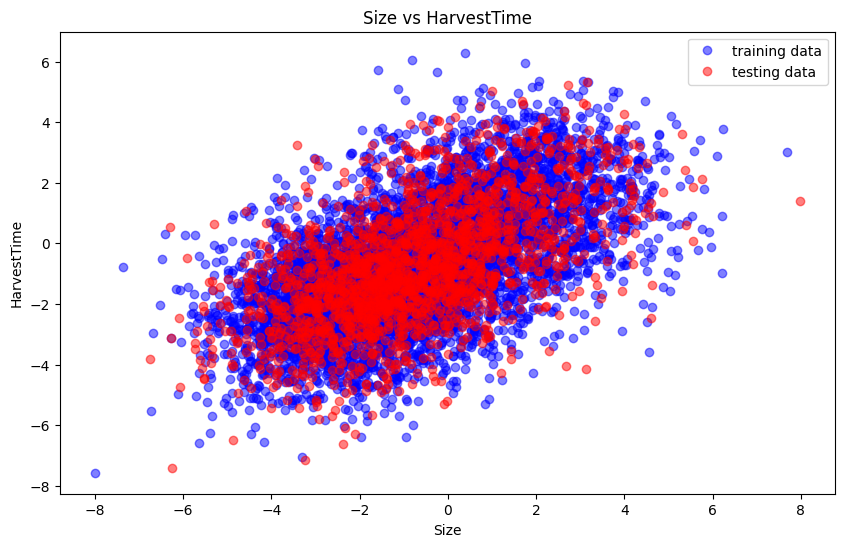

In [22]:

plt.figure(figsize=(10, 6))
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'{feature1} vs {feature2}')
plt.plot(X_train, Y_train,linestyle='',color='blue' ,alpha=0.5,marker="o",label="training data")
plt.plot(X_test,Y_test,linestyle='',color='red' ,alpha=0.5,marker="o",label="testing data")
plt.legend()
plt.show()

Shape of dataset: (8000, 8)
Missing values: 14
Data types: Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object
Zero values: 4002
Mean size: -0.75

Most correlated feature pairs:
      Feature 1    Feature 2  Correlation
0          Size  HarvestTime         0.58
1        Weight      Acidity         0.44
2        Weight    Sweetness         0.42
3        Weight      Quality         0.39
4     Sweetness      Quality         0.38
5   HarvestTime      Quality         0.38
6          Size      Quality         0.35
7      Ripeness      Acidity         0.35
8      Ripeness      Quality         0.35
9          Size    Sweetness         0.26
10     Softness     Ripeness         0.25
11    Sweetness  HarvestTime         0.20
12     Softness  HarvestTime         0.19
13       Weight     Softness         0.19
14    Sweetness      Acidity         0.19
15  

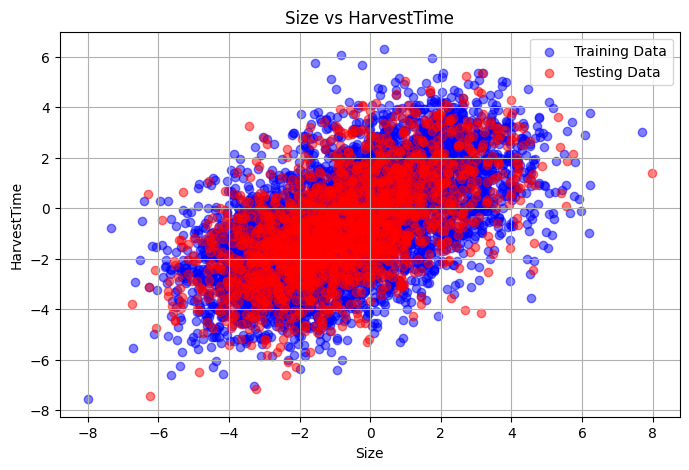

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def analyze_banana_quality(file_path):
    df = pd.read_csv(file_path)
    df['Quality'] = df['Quality'].apply(lambda x: 1 if x == 'Good' else 0)
    
    print(f"Shape of dataset: {df.shape}")
    print(f"Missing values: {df.isnull().sum().sum()}")
    print(f"Data types: {df.dtypes}")
    print(f"Zero values: {(df == 0).sum().sum()}")
    print(f"Mean size: {df['Size'].mean().round(2)}")
    
    # Correlation analysis
    corr_matrix = df.corr().abs()
    sol_df = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
              .stack().sort_values(ascending=False).reset_index())
    sol_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
    sol_df['Correlation'] = sol_df['Correlation'].round(2)
    
    # Print the DataFrame with feature correlations
    print("\nMost correlated feature pairs:")
    print(sol_df)
    
    feature1, feature2, correlation = sol_df.iloc[0]  # Get the most correlated pair
    print(f"\nMost correlated pair: {feature1} and {feature2} with correlation {correlation:.2f}")
    
    x, y = df[feature1], df[feature2]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    
    print(f"Training size: {(X_train.shape[0], Y_train.shape[0])}")
    print(f"Testing size: {(X_test.shape[0], Y_test.shape[0])}")
    
    # Plotting
    plt.figure(figsize=(8, 5))
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'{feature1} vs {feature2}')
    plt.scatter(X_train, Y_train, color='blue', alpha=0.5, label="Training Data")
    plt.scatter(X_test, Y_test, color='red', alpha=0.5, label="Testing Data")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
analyze_banana_quality("banana_quality.csv")


Shape of dataset: (8000, 8)
Missing values: 14
Data types: Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object
Zero values: 4002
Mean size: -0.75

Most correlated feature pairs:
      Feature 1    Feature 2  Correlation
0          Size  HarvestTime         0.58
1        Weight      Acidity         0.44
2        Weight    Sweetness         0.42
3        Weight      Quality         0.39
4     Sweetness      Quality         0.38
5   HarvestTime      Quality         0.38
6          Size      Quality         0.35
7      Ripeness      Acidity         0.35
8      Ripeness      Quality         0.35
9          Size    Sweetness         0.26
10     Softness     Ripeness         0.25
11    Sweetness  HarvestTime         0.20
12     Softness  HarvestTime         0.19
13       Weight     Softness         0.19
14    Sweetness      Acidity         0.19
15  

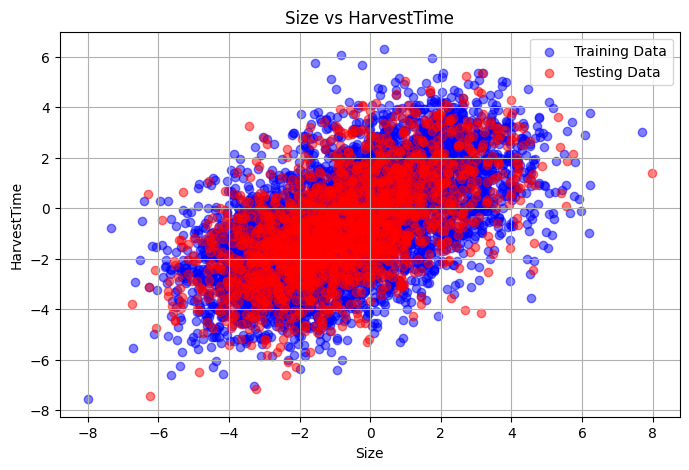

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_csv("banana_quality.csv")

# Convert 'Quality' column to 1 for 'Good' and 0 for anything else
df['Quality'] = df['Quality'].apply(lambda x: 1 if x == 'Good' else 0)

# Print shape of dataset
print(f"Shape of dataset: {df.shape}")

# Check and print the number of missing values
print(f"Missing values: {df.isnull().sum().sum()}")

# Print data types of each column
print(f"Data types: {df.dtypes}")

# Count and print zero values in the dataset
print(f"Zero values: {(df == 0).sum().sum()}")

# Calculate and print the mean of the 'Size' column, rounded to 2 decimal places
print(f"Mean size: {df['Size'].mean().round(2)}")

# Calculate correlation matrix (absolute values)
corr_matrix = df.corr().abs()

# Extract upper triangle of the correlation matrix, stack it, sort it, and reset the index
sol_df = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
          .stack().sort_values(ascending=False).reset_index())
sol_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Round correlation values to 2 decimal places
sol_df['Correlation'] = sol_df['Correlation'].round(2)

# Print most correlated feature pairs
print("\nMost correlated feature pairs:")
print(sol_df)

# Get the most correlated feature pair and its correlation
feature1, feature2, correlation = sol_df.iloc[0]
print(f"\nMost correlated pair: {feature1} and {feature2} with correlation {correlation:.2f}")

# Split the data into training and testing sets for the most correlated features
x, y = df[feature1], df[feature2]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Print the sizes of training and testing datasets
print(f"Training size: {(X_train.shape[0], Y_train.shape[0])}")
print(f"Testing size: {(X_test.shape[0], Y_test.shape[0])}")

# Plot the training and testing data
plt.figure(figsize=(8, 5))
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'{feature1} vs {feature2}')
plt.scatter(X_train, Y_train, color='blue', alpha=0.5, label="Training Data")
plt.scatter(X_test, Y_test, color='red', alpha=0.5, label="Testing Data")
plt.legend()
plt.grid(True)
plt.show()
